## Data Analysis Mathematics, Algorithms and Modeling - PROG8431
## Problem Analysis Workshop 4
### Conestoga College, School of Applied CS & IT, Course Instructor - Darryl Poworoznyk

## Group 6

## Members:
| **Name**                 | **Student ID** | **Email**       |
|--------------------------|----------------|-----------------|
| Christo Pananjickal Baby | 8989796        | Cpananjickalbab9796@conestogac.on.ca|
| Kumari Nikitha Singh     | 9053016       | Ksingh3016@conestogac.on.ca|
| Srinu Babu Rai           | 8994032  |Srai4032@conestogac.on.ca |

# Dataset Overview

* The introvert, extrovert, ambivert dataset
* 20,000 rows
* Synthetic personality data
* More than 30 features
* Synthetically randomly generated datetime column - generated for time series analysis


## Columns Description

| Column                     | Description                                                                                    |
|----------------------------|------------------------------------------------------------------------------------------------|
| `personality_type`         | Categorical label for personality: Extrovert, Ambivert, or Introvert                           |
| `social_energy`            | Numerical score indicating social energy level (0-10)                                          |
| `alone_time_preference`    | Preference score for spending time alone (0-10)                                                |
| `talkativeness`            | Talkativeness tendency score (0-10)                                                            |
| `deep_reflection`          | Tendency for deep self-reflection (0-10)                                                       |
| `group_comfort`            | Comfort level in groups (0-10)                                                                 |
| `party_liking`             | Liking for parties and social gatherings (0-10)                                                |
| `listening_skill`          | Listening skill level (0-10)                                                                   |
| `empathy`                  | Empathy score (0-10)                                                                           |
| `creativity`               | Creativity tendency (0-10)                                                                     |
| `organization`             | Organizational skills score (0-10)                                                             |
| `leadership`               | Leadership skill level (0-10)                                                                  |
| `risk_taking`              | Willingness to take risks (0-10)                                                               |
| `public_speaking_comfort`  | Comfort with public speaking (0-10)                                                            |
| `curiosity`                | Curiosity level (0-10)                                                                         |
| `routine_preference`       | Preference for routines (0-10)                                                                 |
| `excitement_seeking`       | Tendency to seek excitement (0-10)                                                             |
| `friendliness`             | Friendliness score (0-10)                                                                      |
| `emotional_stability`      | Emotional stability level (0-10)                                                               |
| `planning`                 | Planning skill score (0-10)                                                                    |
| `spontaneity`              | Spontaneity tendency (0-10)                                                                    |
| `adventurousness`          | Adventurousness score (0-10)                                                                   |
| `reading_habit`            | Frequency of reading books (0-10)                                                              |
| `sports_interest`          | Interest in sports activities (0-10)                                                           |
| `online_social_usage`      | Time spent on social media (0-10)                                                              |
| `travel_desire`            | Desire to travel (0-10)                                                                        |
| `gadget_usage`             | Tendency to use gadgets frequently (0-10)                                                      |
| `work_style_collaborative` | Preference for collaborative work style (0-10)                                                 |
| `decision_speed`           | Speed of making decisions (0-10)                                                               |
| `stress_handling`          | Ability to handle stress effectively (0-10)                                                    |
| `productivity_score`       | **Derived**: Combined score from `organization`, `planning`, `decision_speed` with added noise |
| `stress_level`             | **Derived**: Inverse of `stress_handling` plus slight noise                                    |
| `datetime`                 | The date and time when the observation was recorded                                            |



Research Question (Use Case)
"How do personality traits influence an individual's ability to handle stress in modern social and professional environments?"

This project explores the relationship between psychological traits (like empathy, risk-taking, planning, spontaneity) and the dependent variable stress_handling, aiming to identify traits that significantly impact stress management capabilities.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import calendar
import re
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("data/personality_synthetic_dataset_random_datetime.csv")

Now we can perform a basic cleaning of the dataset to prepare it for analysis. This includes:  Drop duplicates, rows with missing values or rows with numeric conversion issues

In [3]:
df = df.drop_duplicates()
df = df.dropna()

numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=numeric_cols)


In [4]:
# Show the cleaned dataset
display(df.head())

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling,productivity_score,stress_level,datetime,month
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905,4.610771,2.877187,2025-07-03 12.00.40,July
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577,3.752968,7.563477,2025-07-02 11.09.57,July
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480,6.079154,4.678659,2025-07-01 14.11.22,July
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088,4.949075,4.299012,2025-07-02 20.34.15,July
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084,5.659179,6.305141,2025-07-01 03.19.02,July


We can now convert our factor variable to numeric. That is we can convert the `personality_type` column to a numeric representation.

In [5]:
df['personality_type_converted'] = df['personality_type'].astype('category').cat.codes
print("Converted 'personality_type' to numeric:")
display(df[['personality_type','personality_type_converted']].head())

Converted 'personality_type' to numeric:


,personality_type,personality_type_converted
0,Extrovert,1
1,Ambivert,0
2,Ambivert,0
3,Extrovert,1
4,Introvert,2


Now we can convert the `datetime` column to a Julian date. This is useful for time series analysis, as it allows us to work with dates in a numerical format.

In [6]:
# Clean up datetime strings: replace periods with colons in time part
df['datetime'] = df['datetime'].apply(lambda x: re.sub(r'(\d{2})\.(\d{2})\.(\d{2})', r'\1:\2:\3', str(x)).strip())


df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Convert to Julian-style ordinal date
df['julian_date'] = df['datetime'].apply(lambda x: x.toordinal())

display(df[['datetime', 'julian_date']].head())

,datetime,julian_date
0,2025-07-03 12:00:40,739435
1,2025-07-02 11:09:57,739434
2,2025-07-01 14:11:22,739433
3,2025-07-02 20:34:15,739434
4,2025-07-01 03:19:02,739433


Now we can convert the categorical variable `month` to a numeric representation. This is useful for time series analysis, as it allows us to work with months in a numerical format.

In [7]:

# Create mapping from month name to number
month_map = {month: idx for idx, month in enumerate(calendar.month_name) if month}
df['month_numeric'] = df['month'].map(month_map)

print("Converted 'month' to numeric values:")
display(df[['month', 'month_numeric']].head())

Converted 'month' to numeric values:


,month,month_numeric
0,July,7
1,July,7
2,July,7
3,July,7
4,July,7


Now we can perform Box-Cox transformation which will help to stabilize the variance and make the data more normally distributed. This is particularly useful for time series analysis, as it allows us to work with data that is more suitable for statistical modeling. We will also dispay each column before and after the transformation.

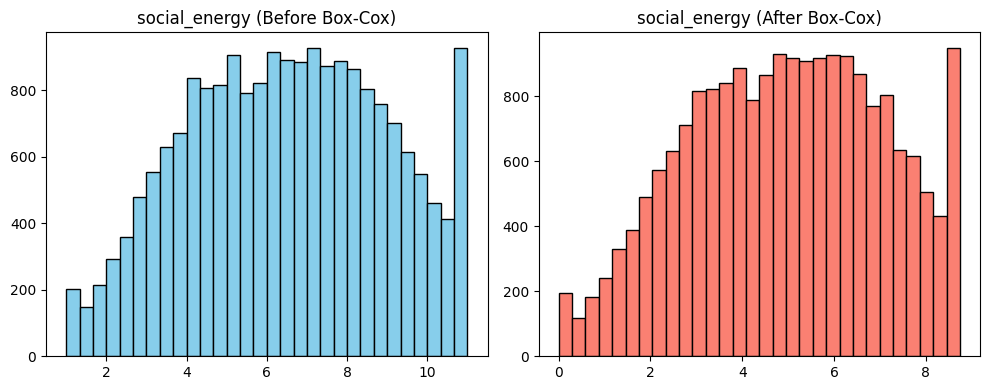

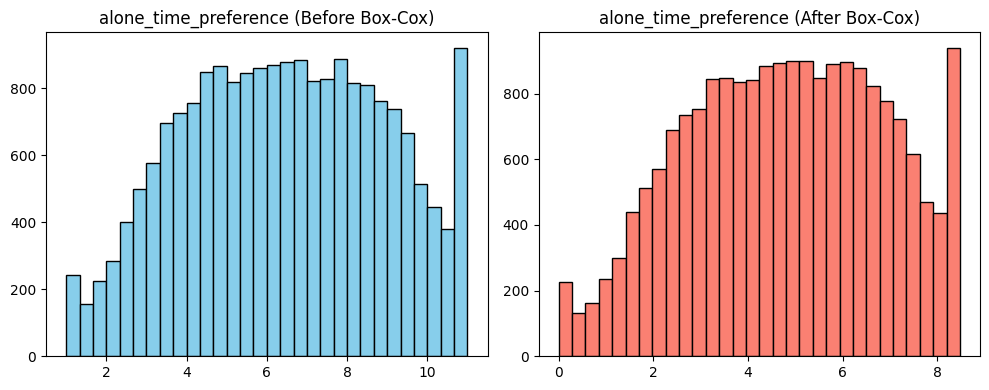

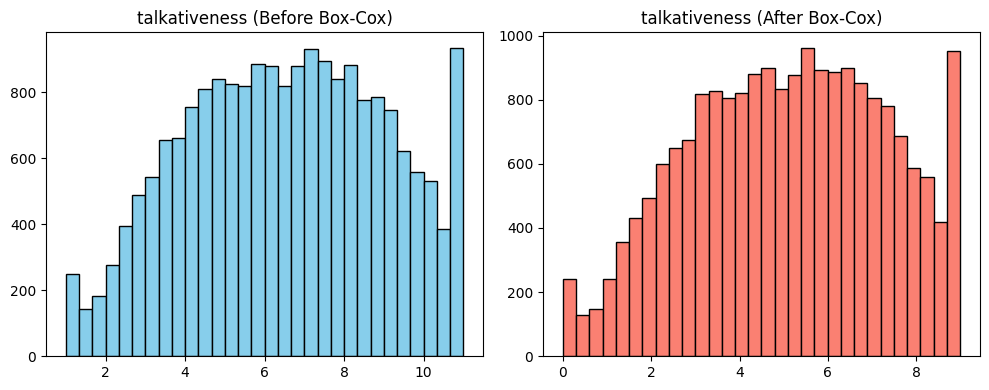

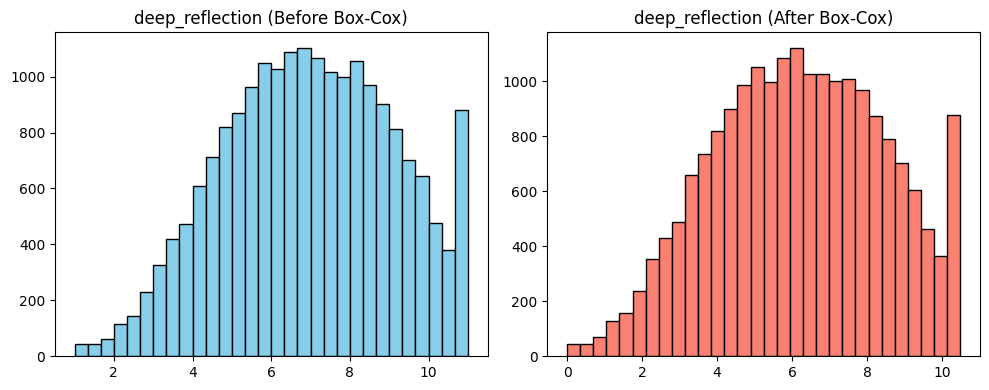

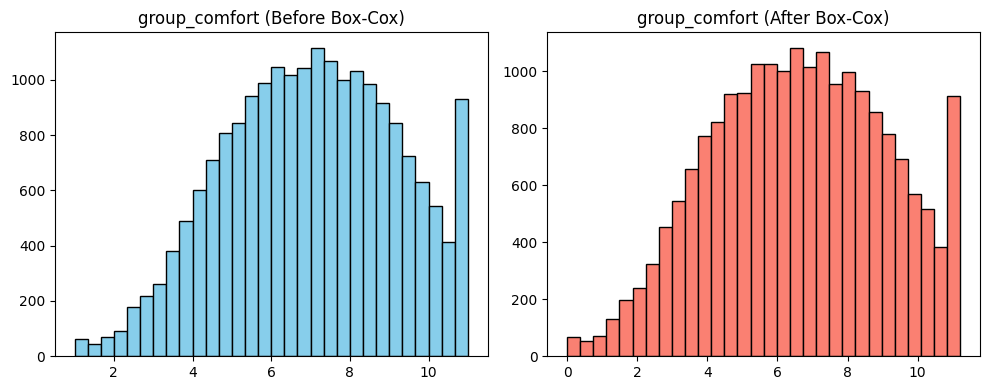

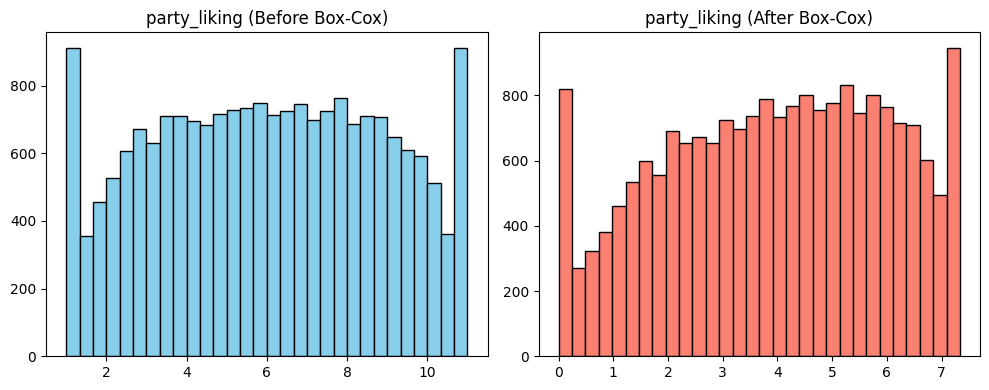

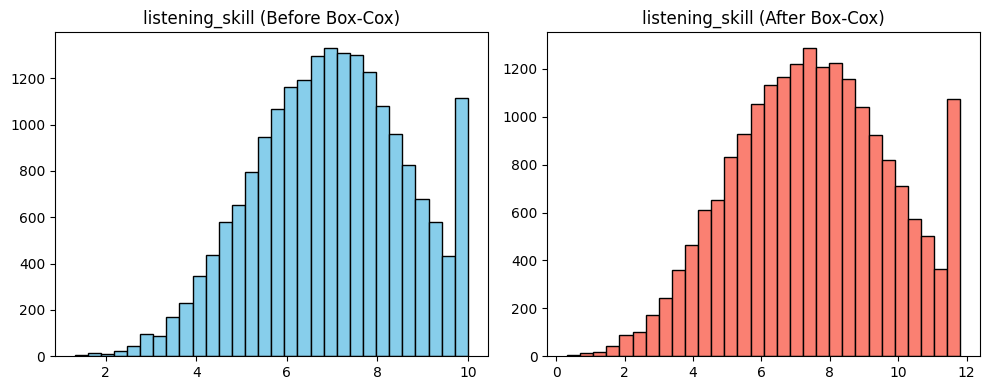

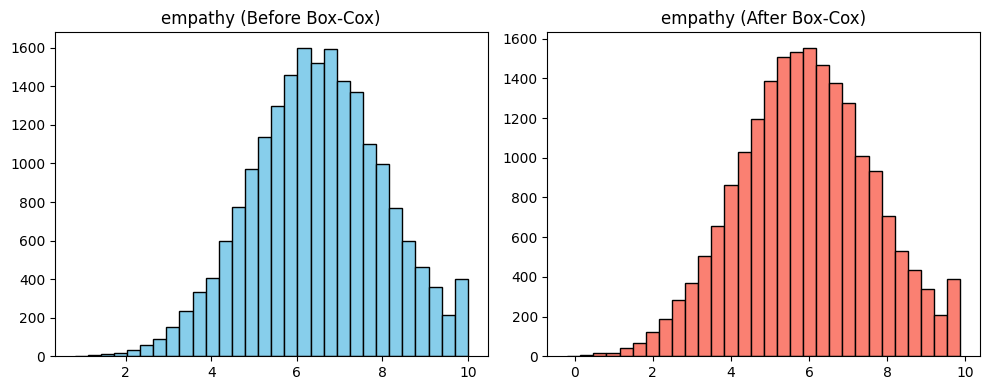

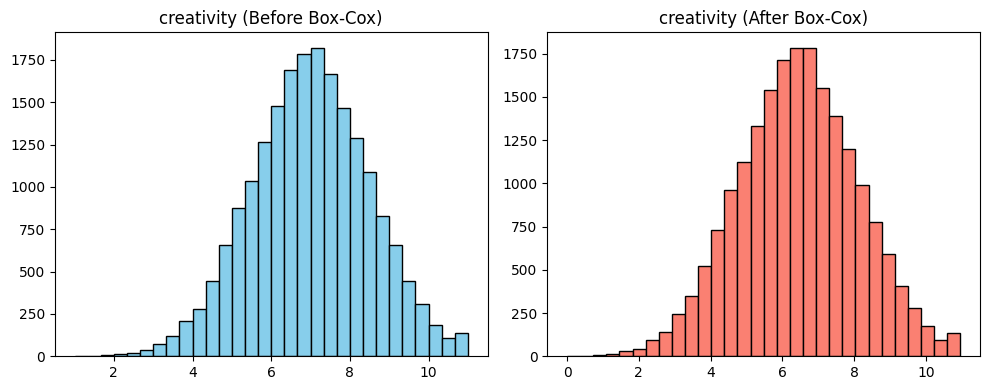

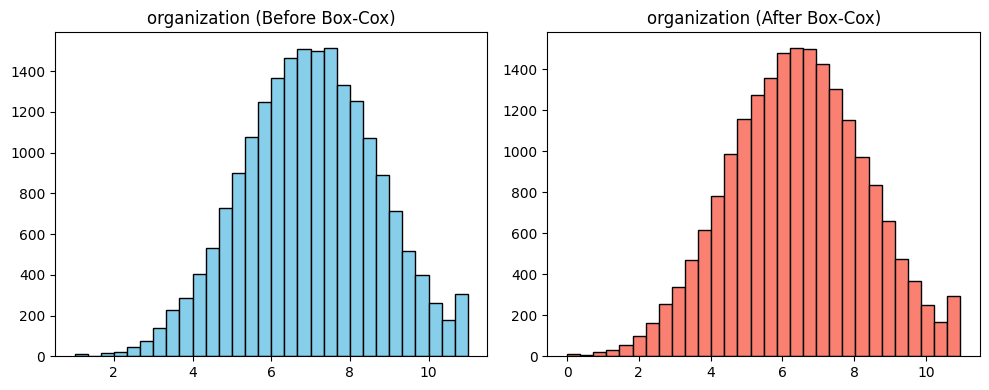

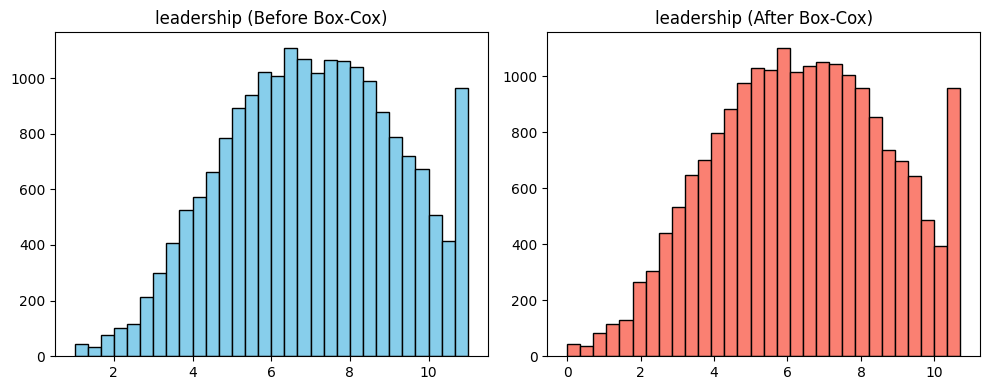

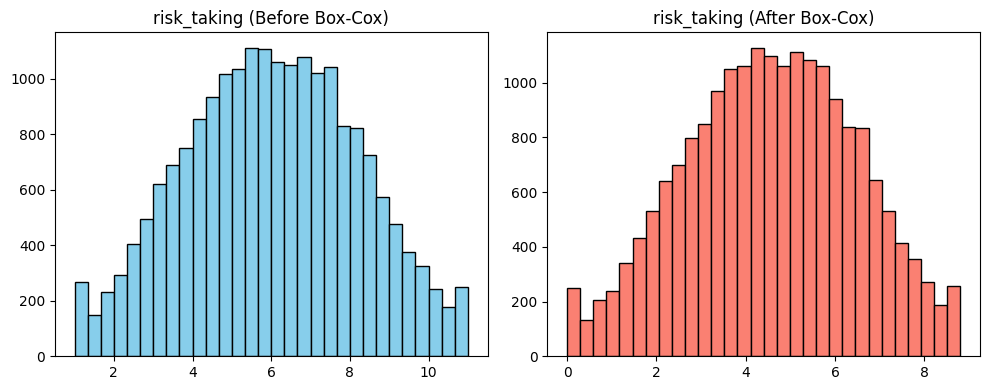

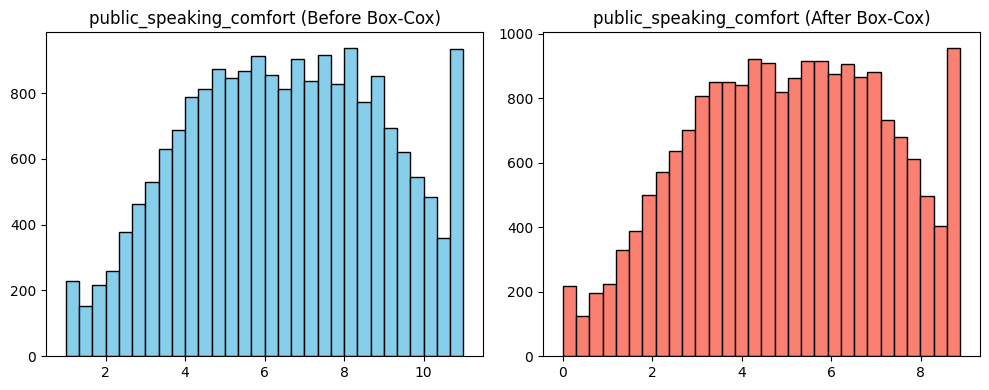

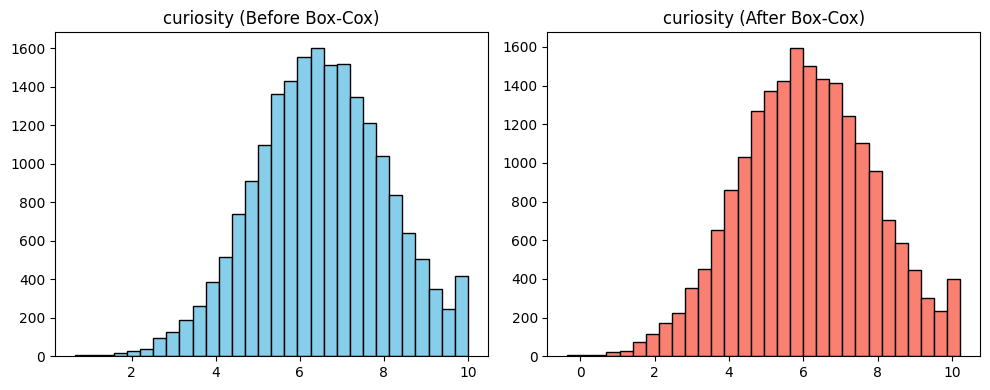

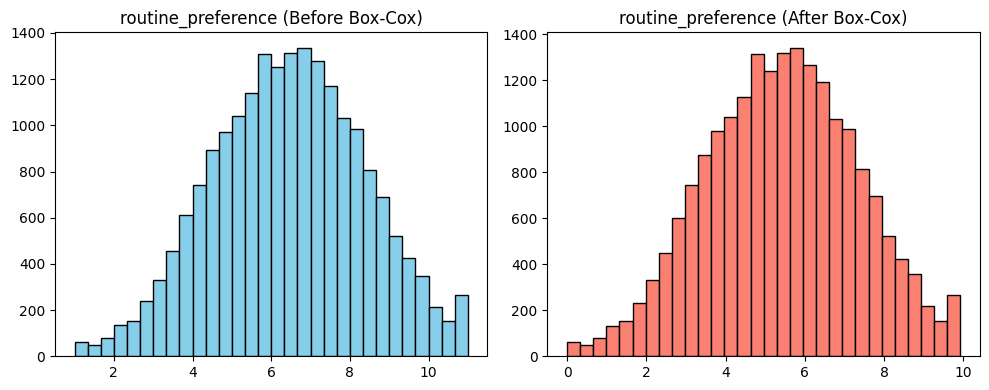

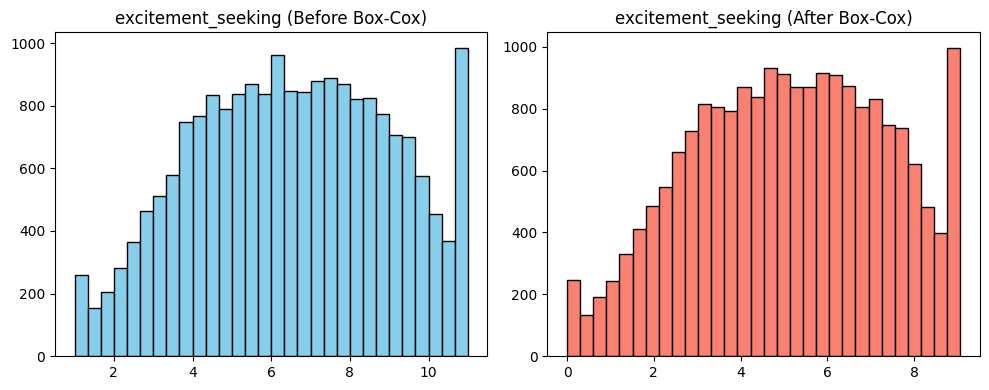

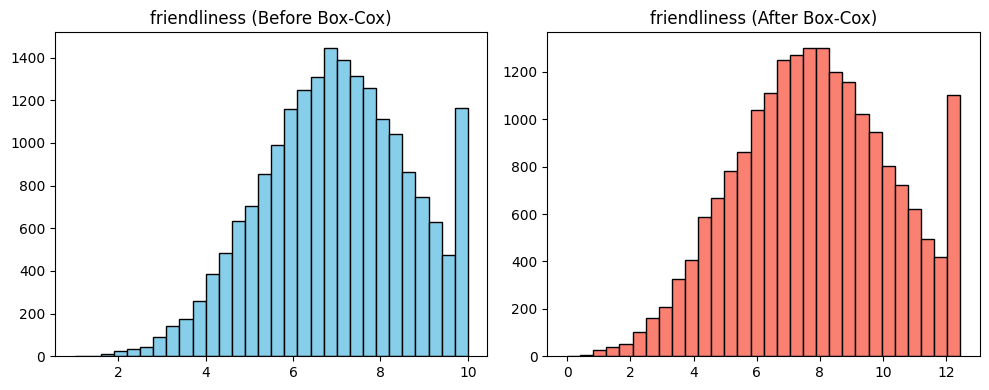

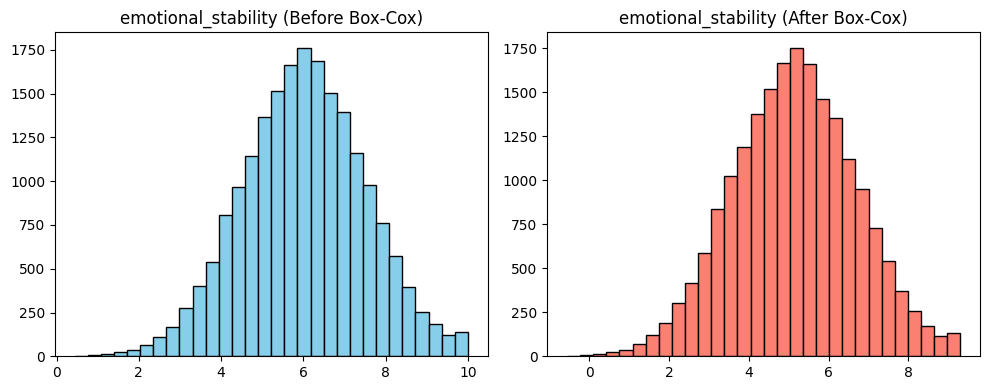

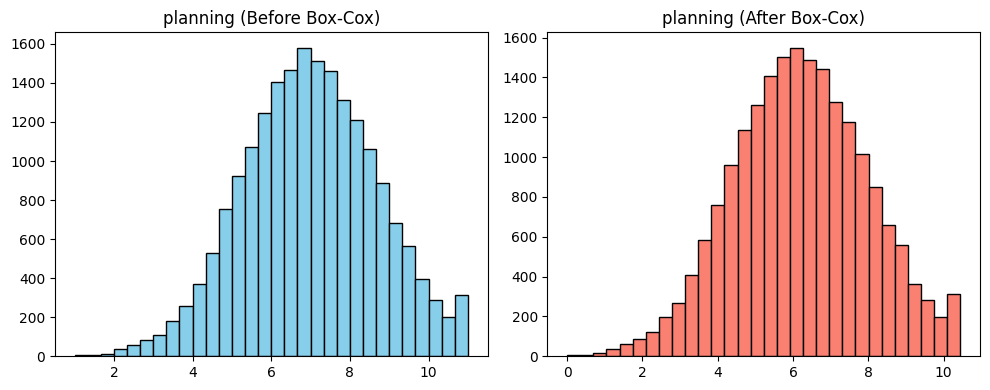

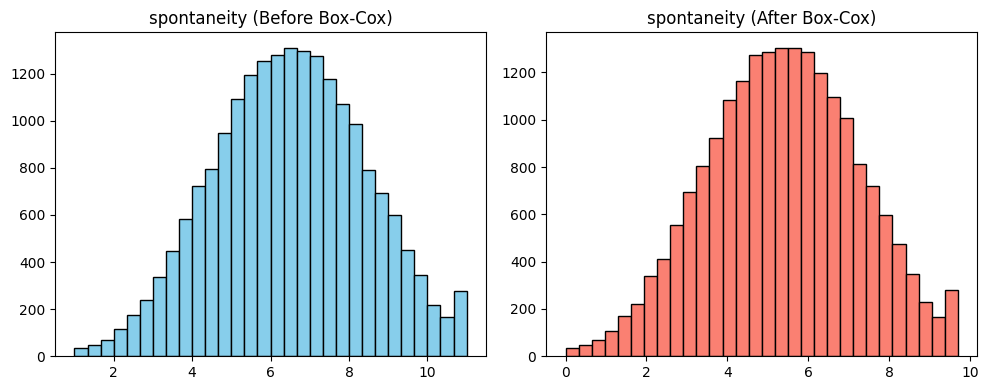

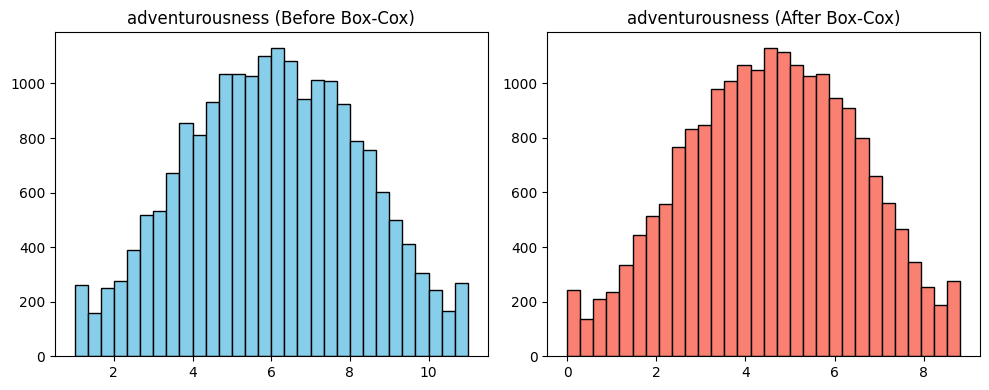

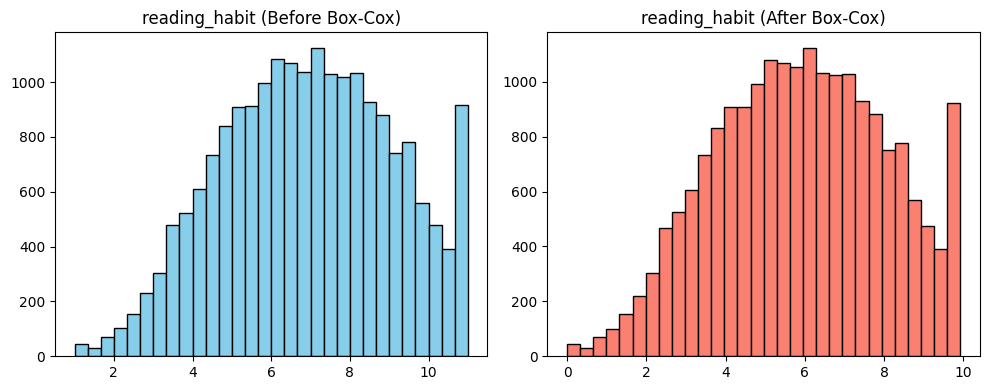

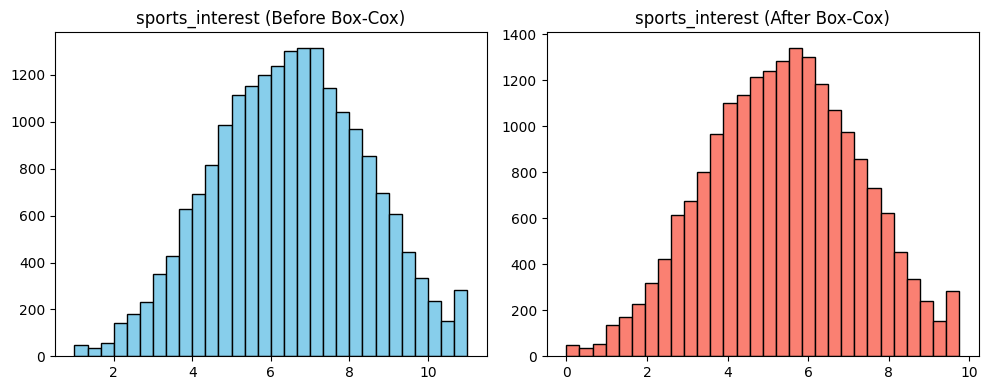

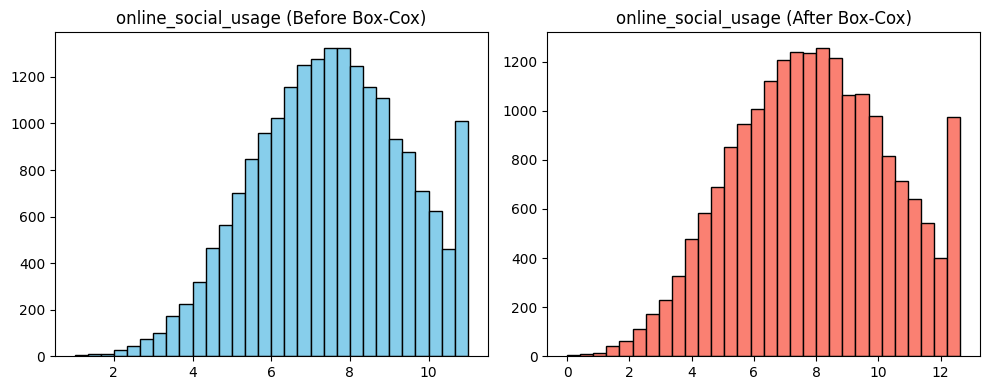

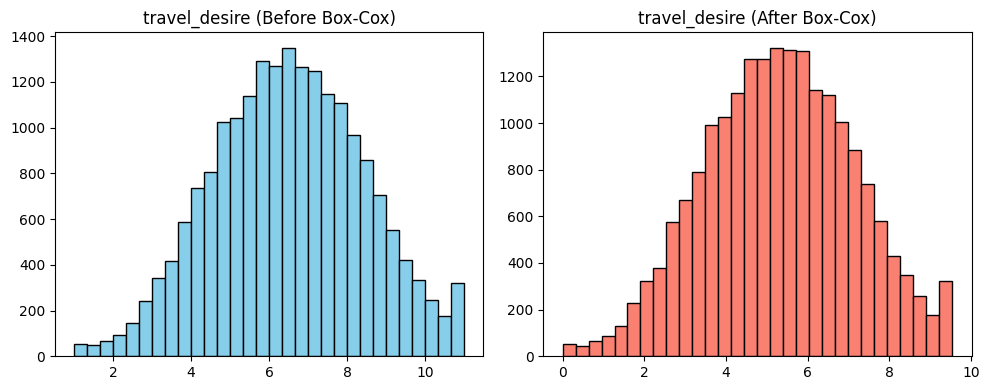

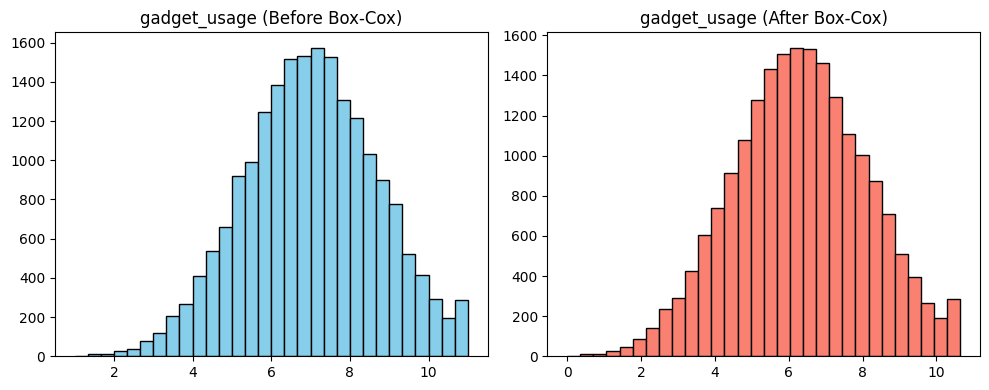

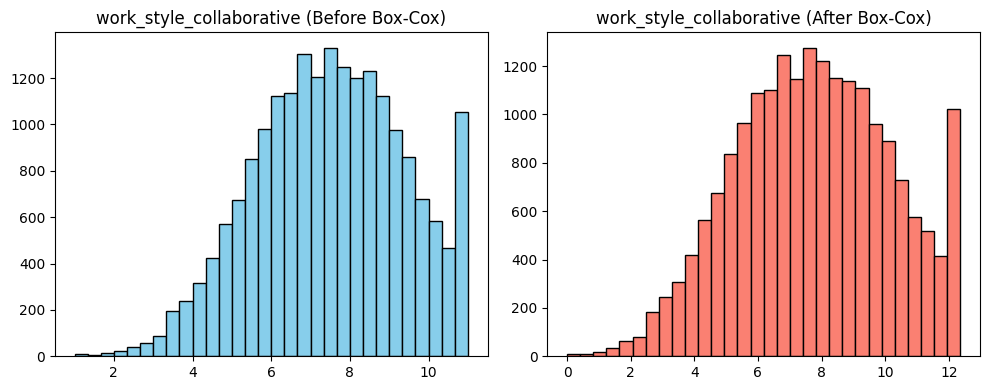

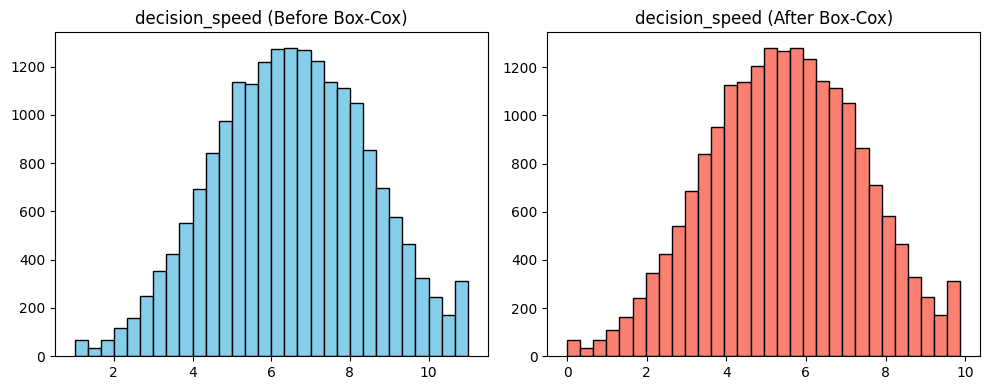

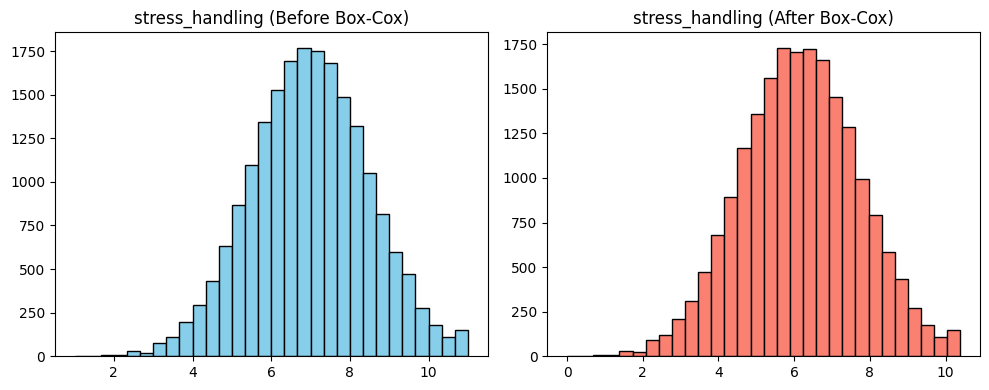

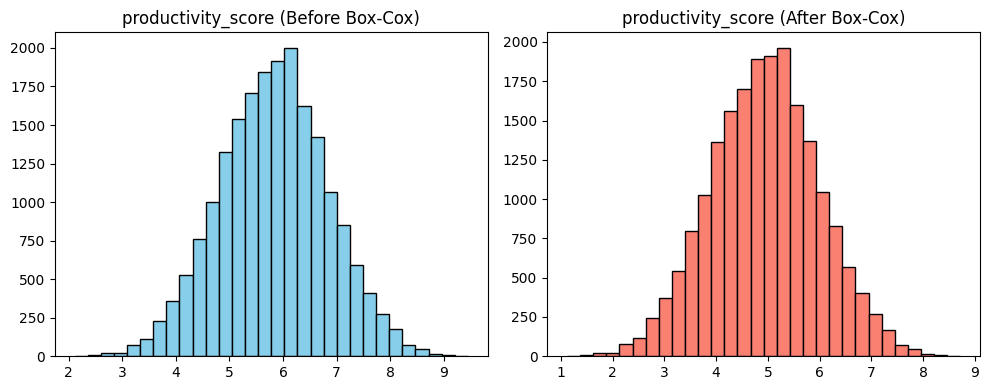

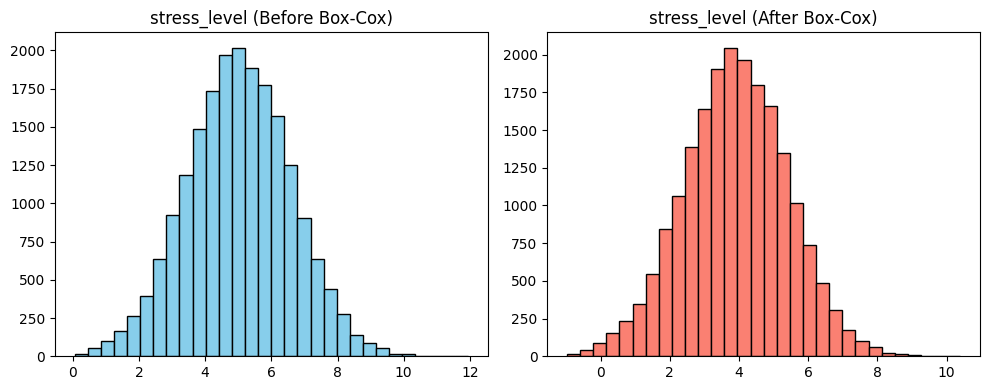

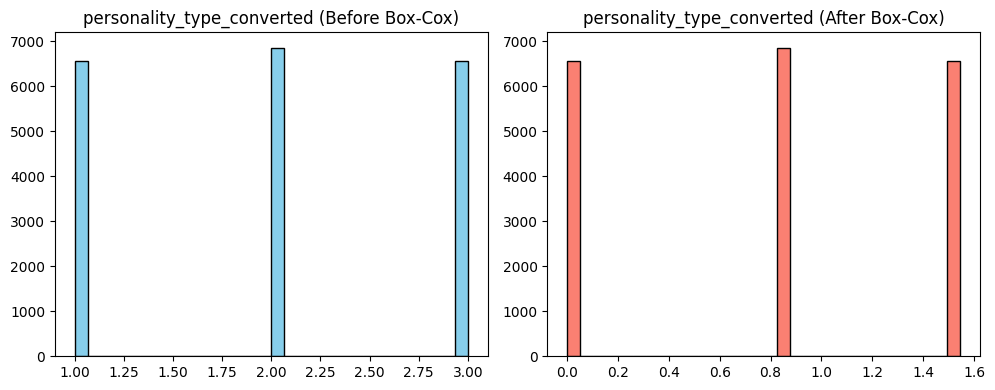

D:\Conestoga\AI ML\Data Analysis\problem_analysis_workshop_4\.env\Lib\site-packages\scipy\stats\_morestats.py:1186: UserWarning: The optimal lambda is 1786.1919992597705, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


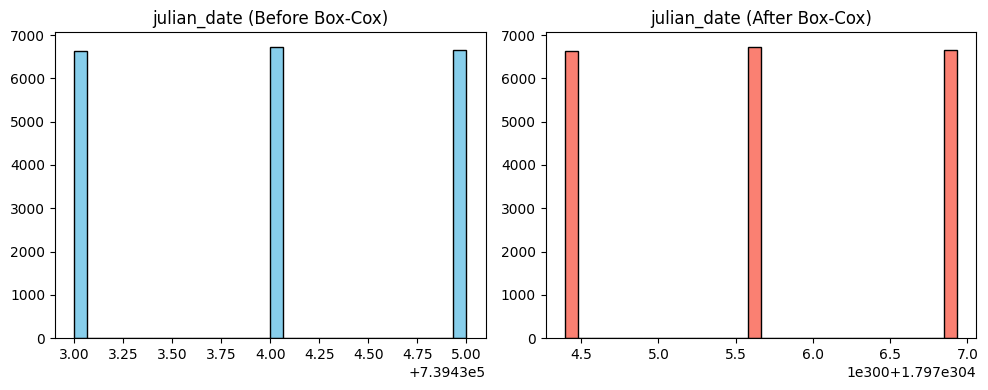

Skipped 'month_numeric': Data must not be constant.


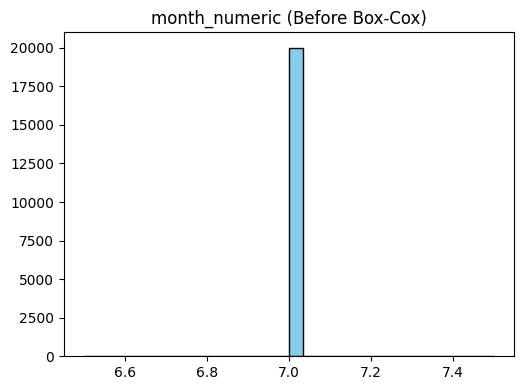

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling,productivity_score,stress_level,personality_type_converted,julian_date
0,6.078373,3.487511,7.898152,2.569961,7.822074,6.436485,7.173915,5.834441,6.599125,0.000000,...,11.453513,4.660465,9.763273,10.095914,7.944141,7.414376,3.682308,2.807133,0.85647,1.797693e+304
1,5.727264,5.056663,6.427611,7.571447,4.418388,2.749003,5.502919,3.110222,6.606360,4.814812,...,5.484686,4.574254,6.251981,6.931914,3.138317,3.497992,2.798909,7.247447,0.00000,1.797566e+304
2,6.637493,5.541083,3.675585,4.769486,5.809473,5.693827,11.050927,5.497145,7.593720,7.664543,...,5.890317,5.912783,6.334813,6.825634,4.533723,5.811966,5.202120,4.526578,0.00000,1.797440e+304
3,5.541156,2.837986,5.541981,2.001594,8.680457,7.335332,10.981473,8.677295,9.729845,5.589998,...,9.327870,6.130643,5.664940,7.938522,6.534544,6.044706,4.031678,4.165783,0.85647,1.797566e+304
4,5.037203,6.080880,3.667449,10.398896,1.717054,0.351130,8.147633,6.199810,10.393960,6.864368,...,9.557681,5.341085,5.981301,6.858182,5.758975,3.844585,4.766573,6.064671,1.54622,1.797440e+304


In [11]:

numeric_df = df.select_dtypes(include=[np.number])
positive_df = numeric_df.apply(lambda x: x + 1 if (x <= 0).any() else x)

box_cox_df = pd.DataFrame()

for col in positive_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot before transformation
    axes[0].hist(positive_df[col], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f"{col} (Before Box-Cox)")
    # Apply Box-Cox and plot after
    try:
        transformed, _ = stats.boxcox(positive_df[col])
        box_cox_df[col] = transformed
        axes[1].hist(transformed, bins=30, color='salmon', edgecolor='black')
        axes[1].set_title(f"{col} (After Box-Cox)")
    except Exception as e:
        print(f"Skipped '{col}': {e}")
        axes[1].set_visible(False)
    plt.tight_layout()
    plt.show()

display(box_cox_df.head())

Now we can apply Tukey's Ladder of Powers transformation (Yeo-Johnson) to the dataset. This transformation is useful for stabilizing variance and making the data more normally distributed, especially for datasets that contain zero or negative values. We will also display each column before and after the transformation.

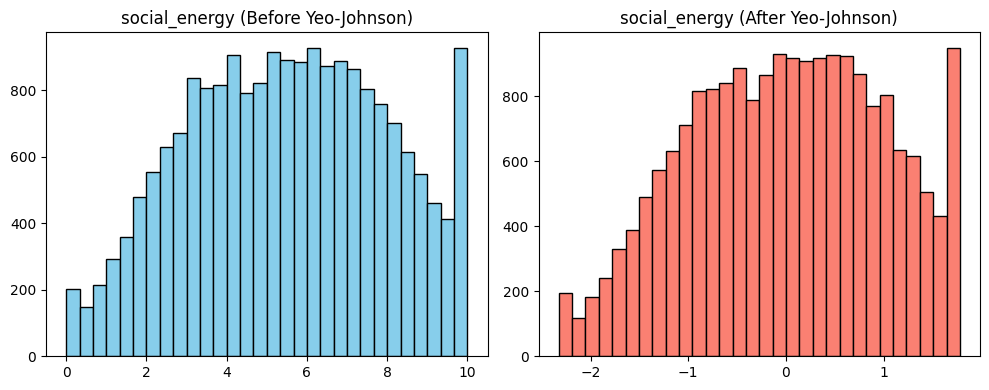

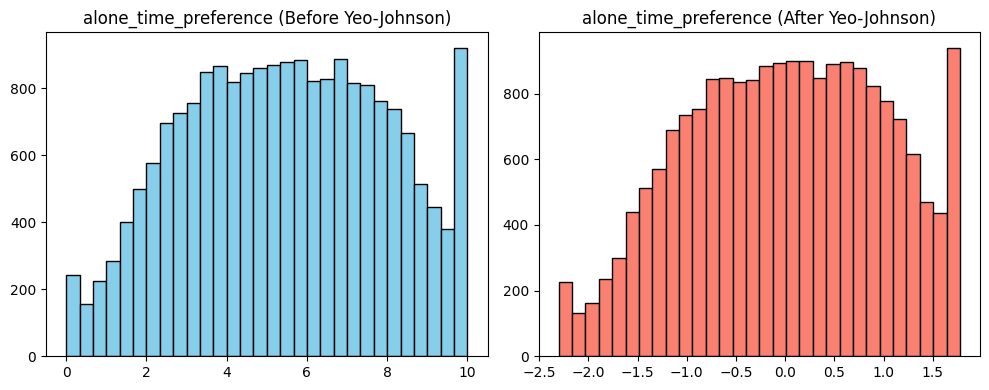

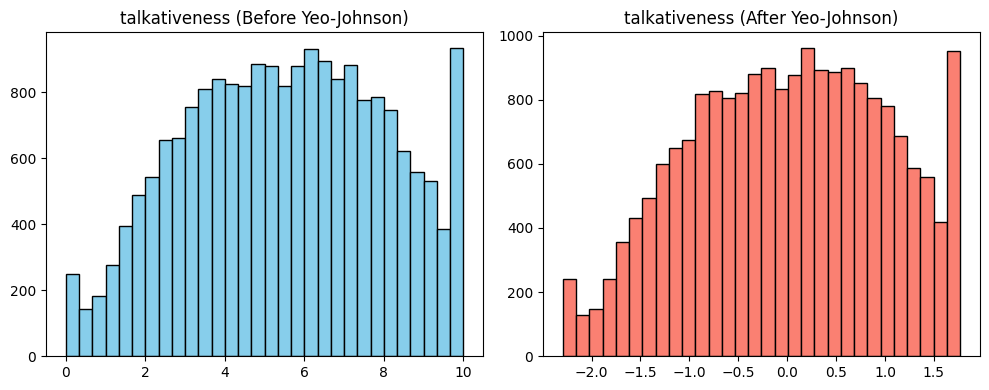

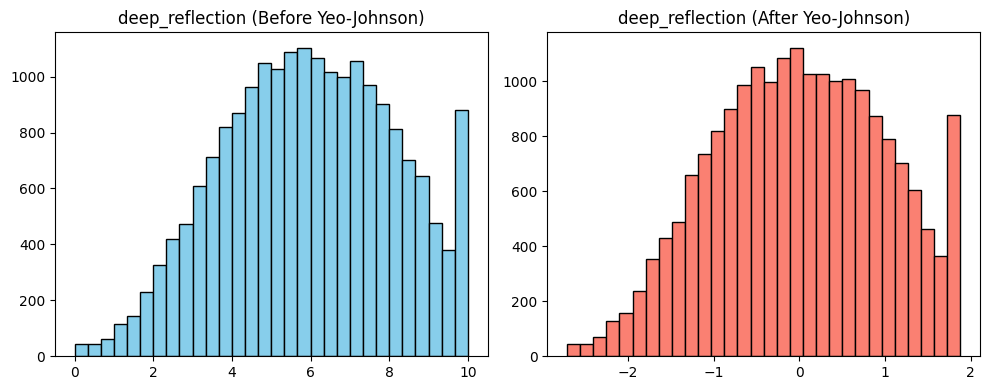

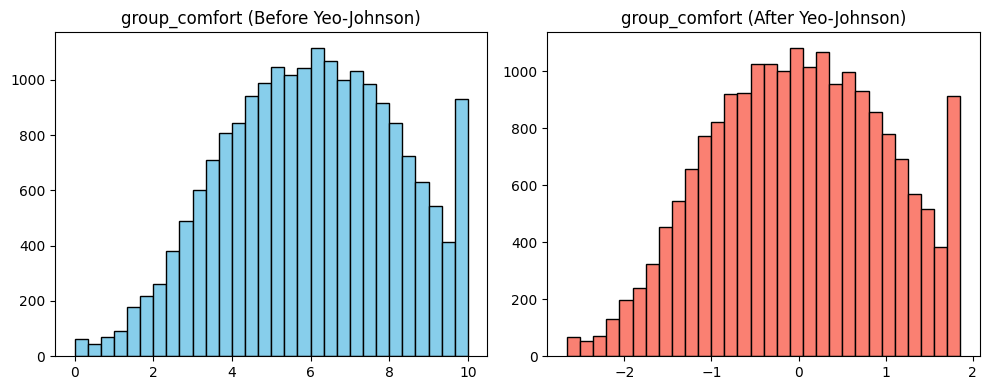

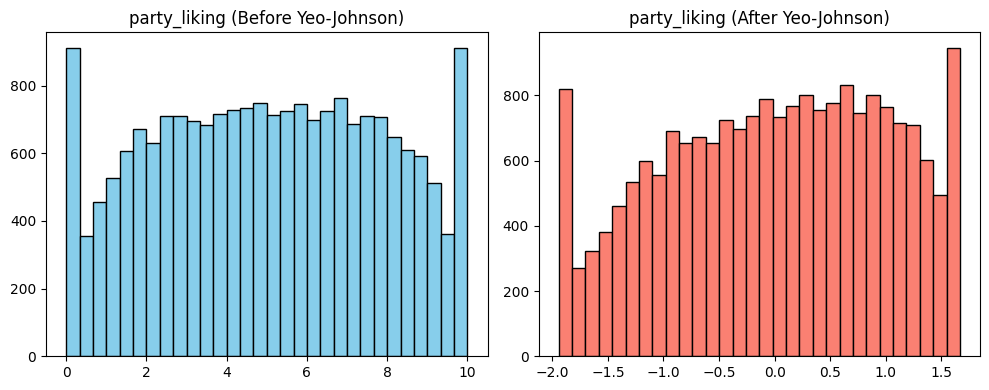

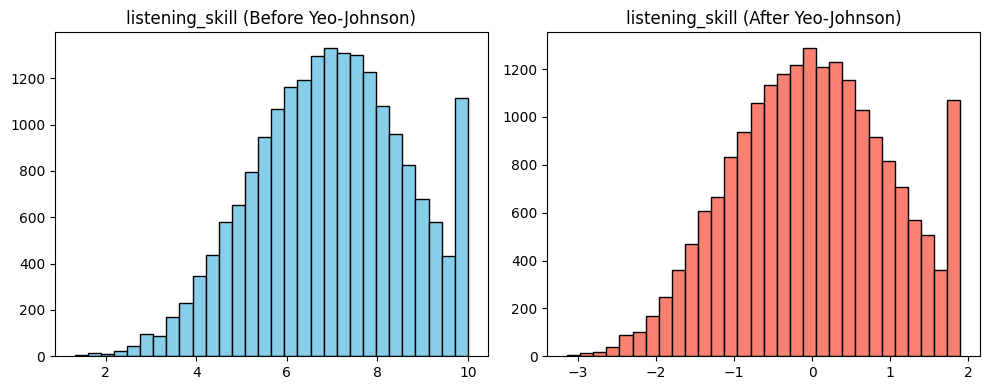

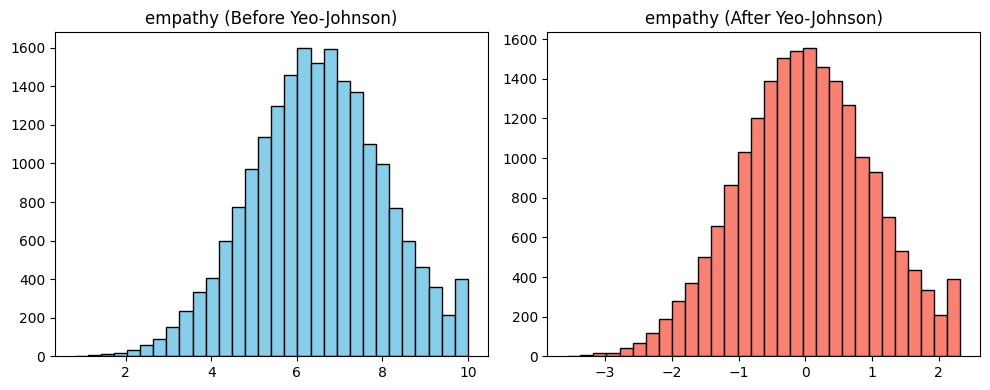

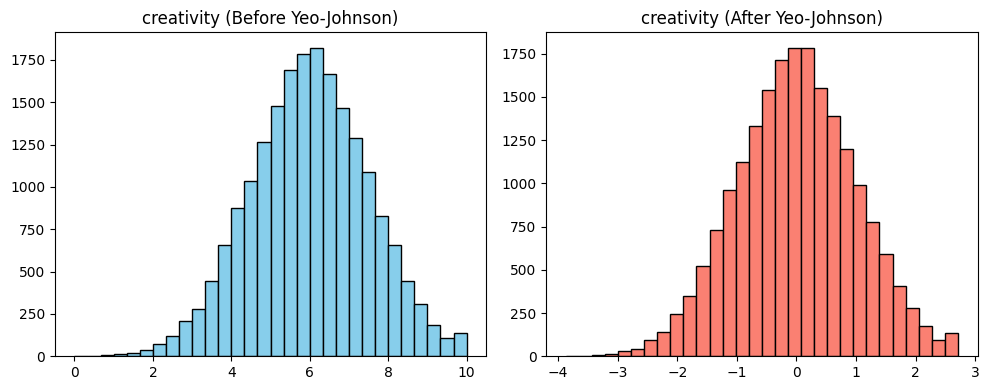

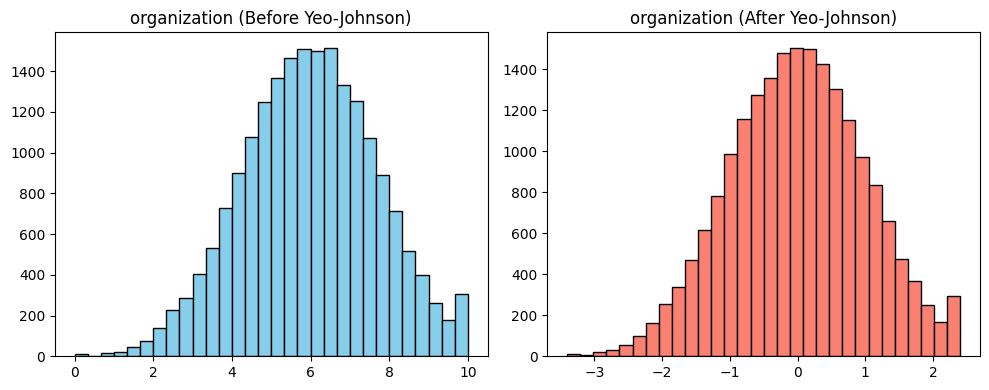

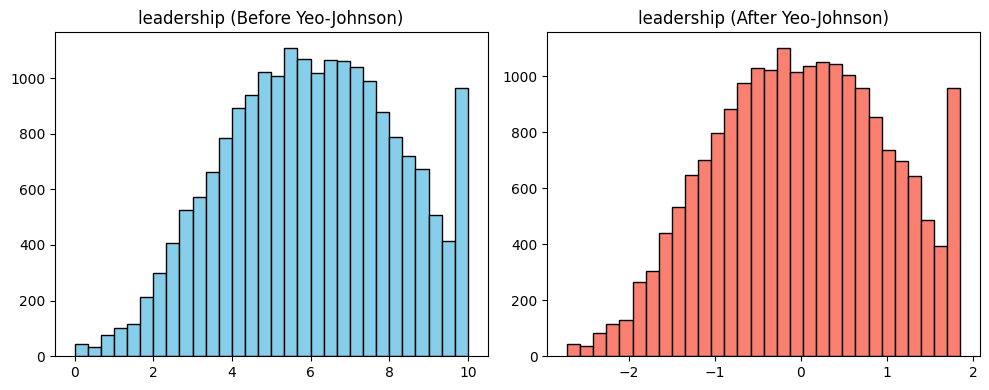

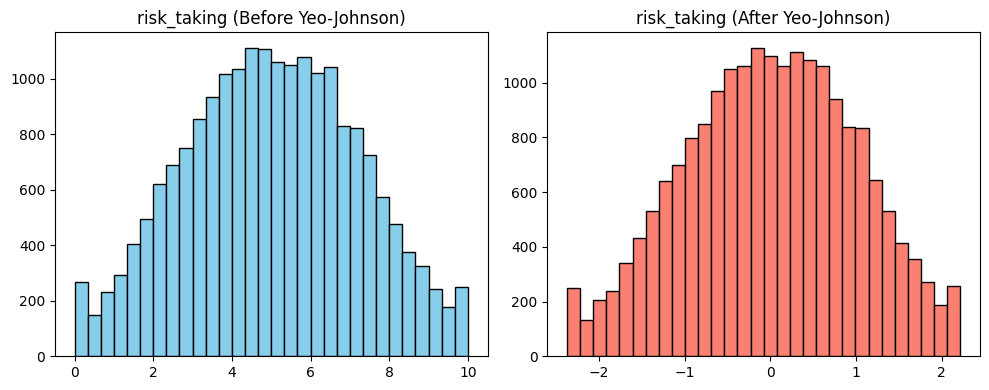

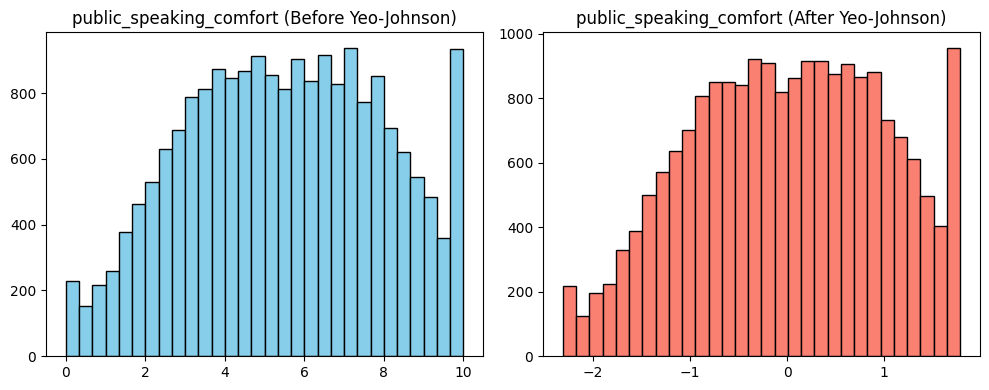

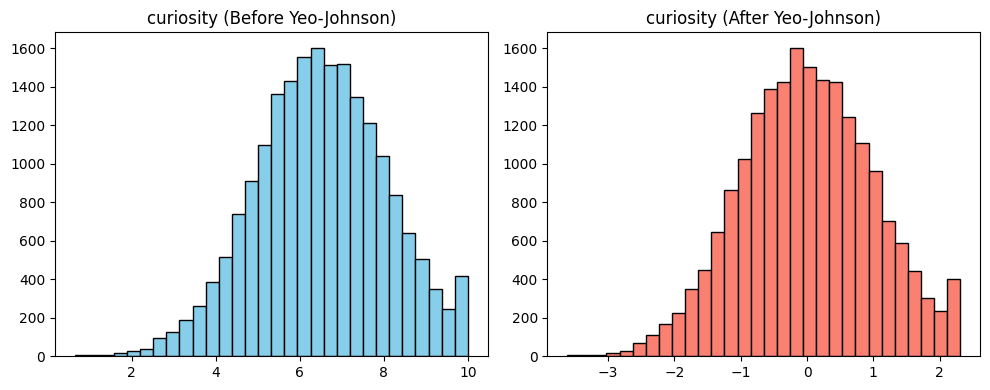

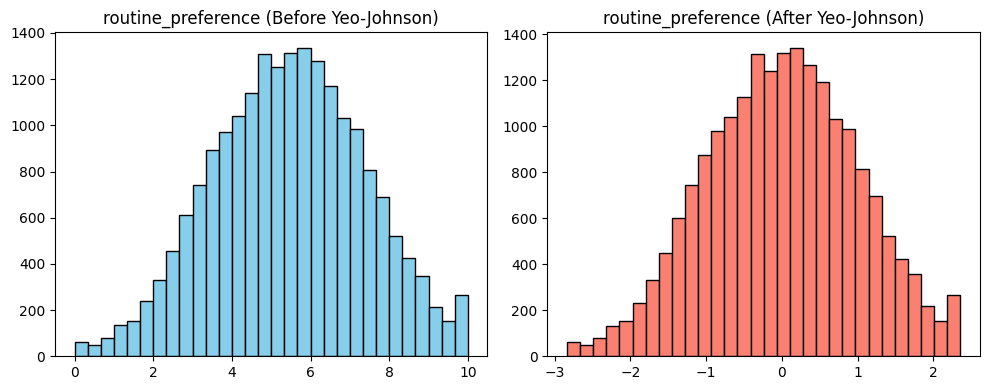

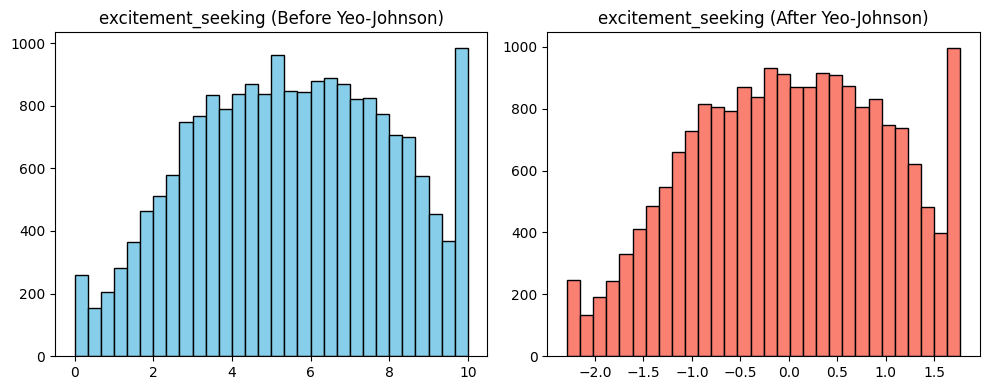

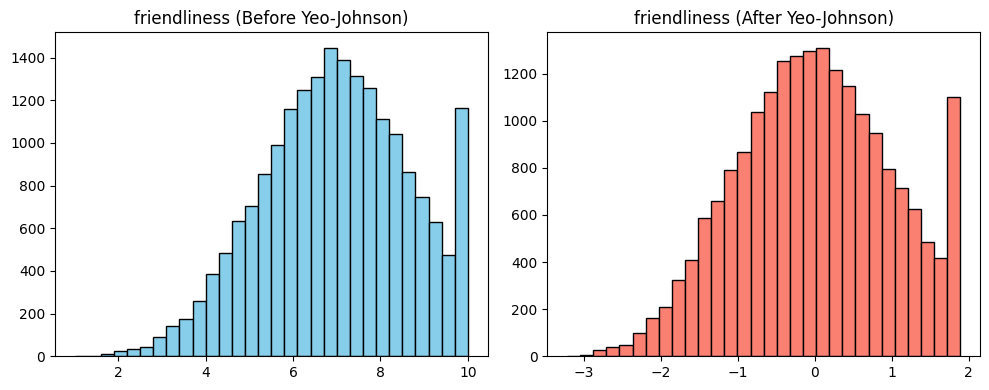

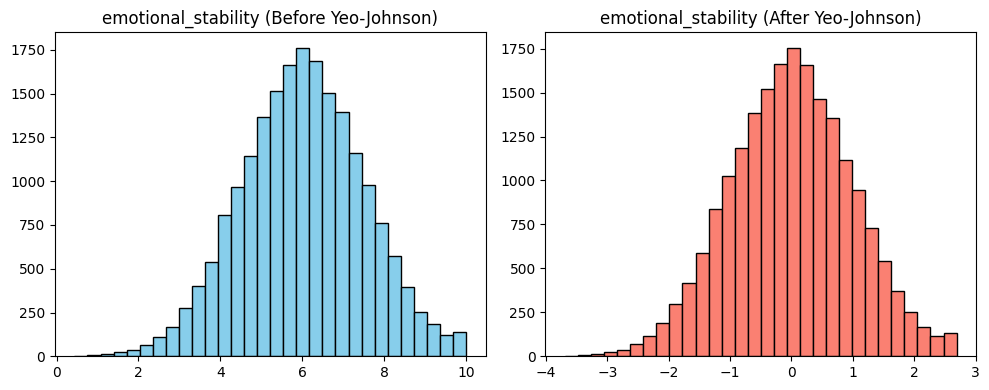

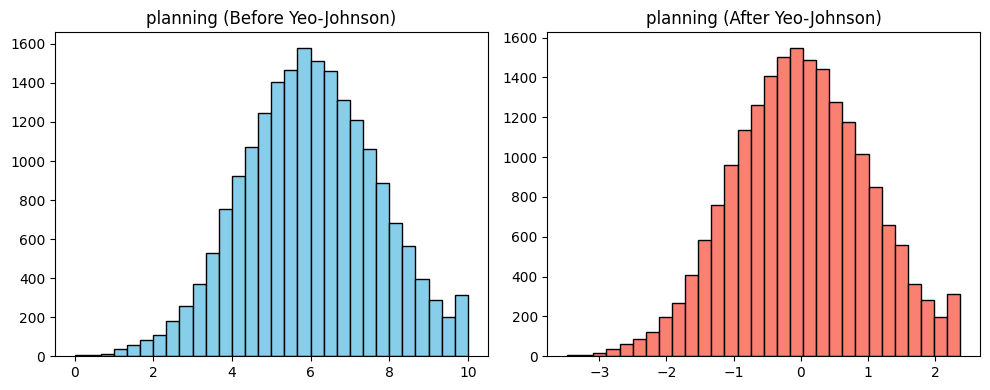

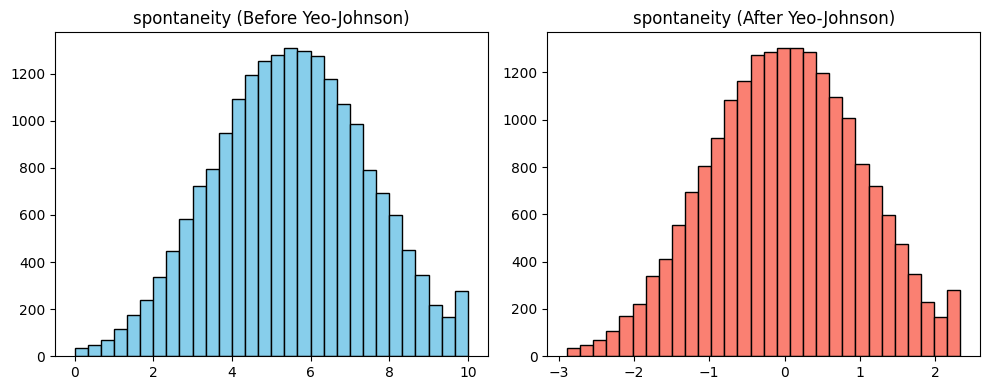

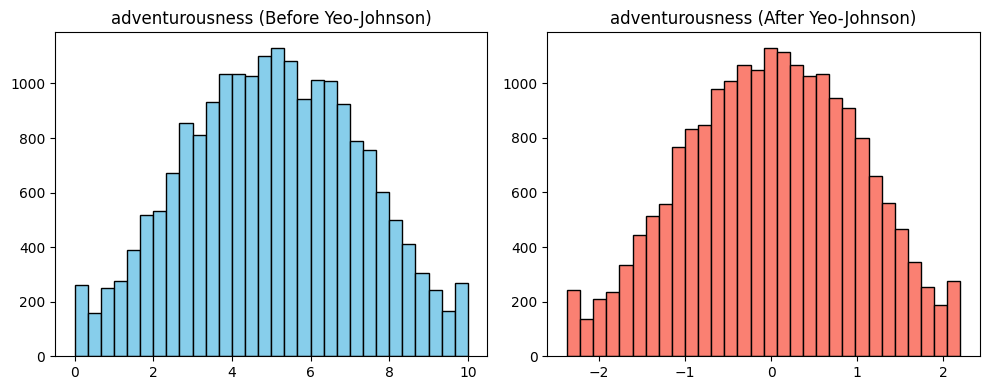

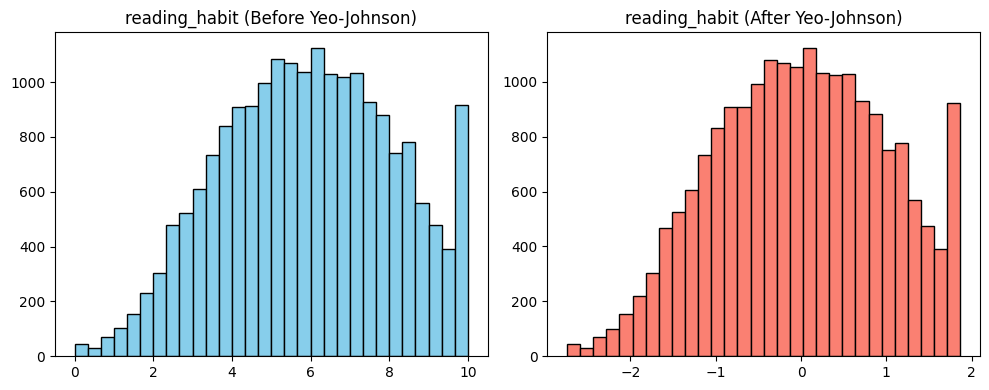

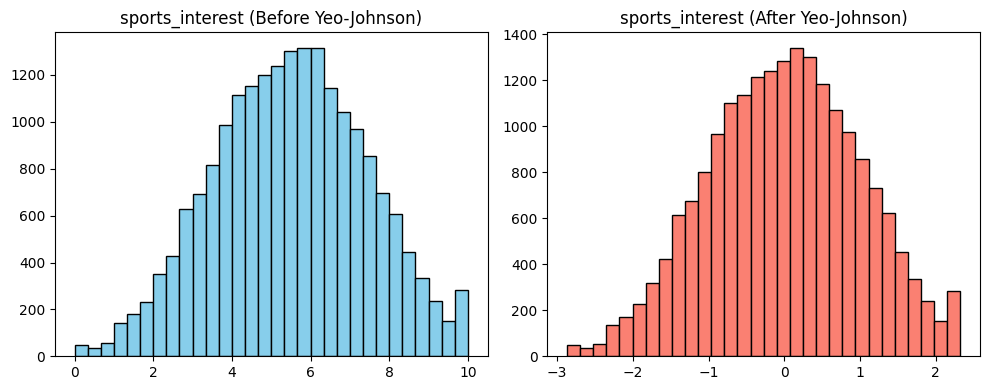

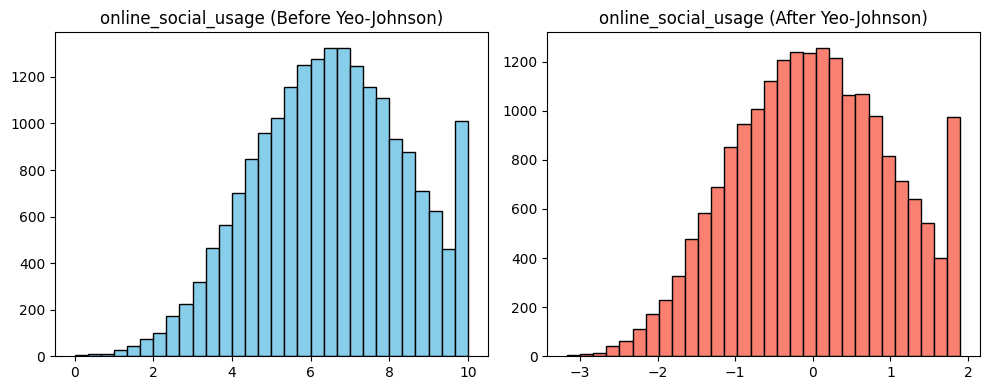

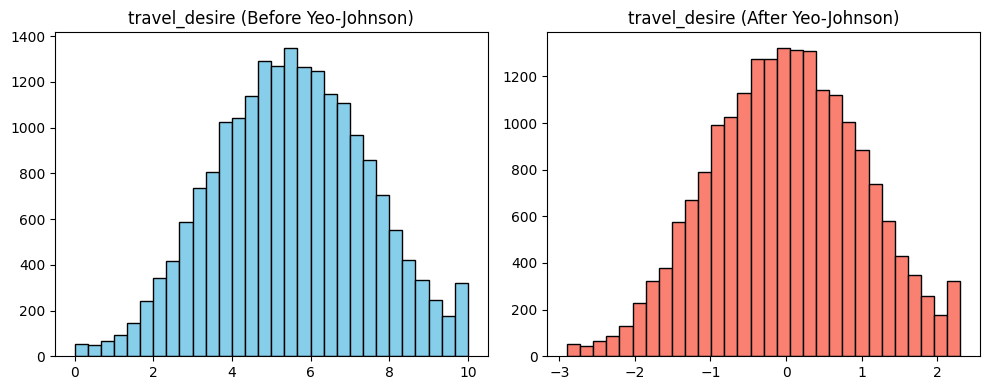

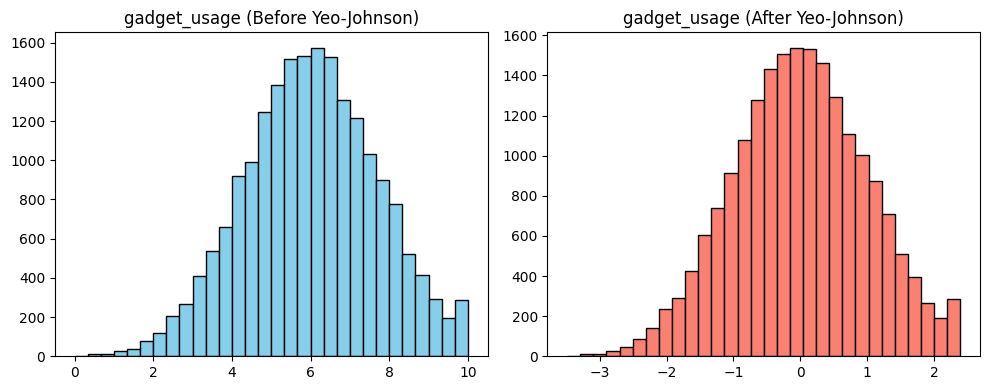

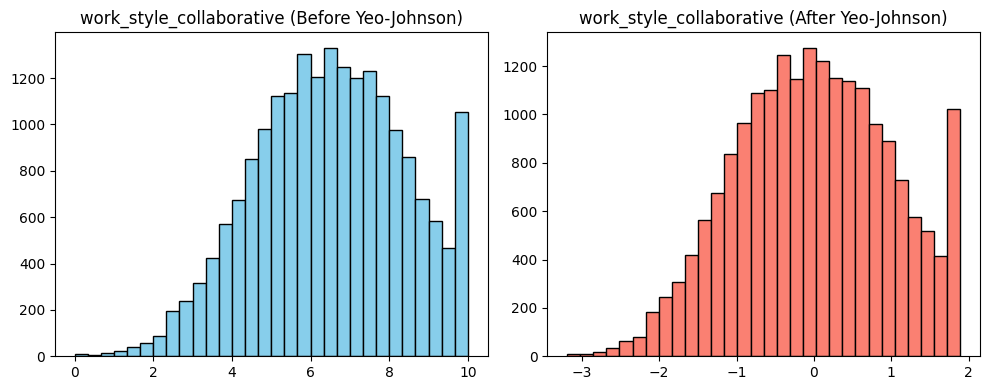

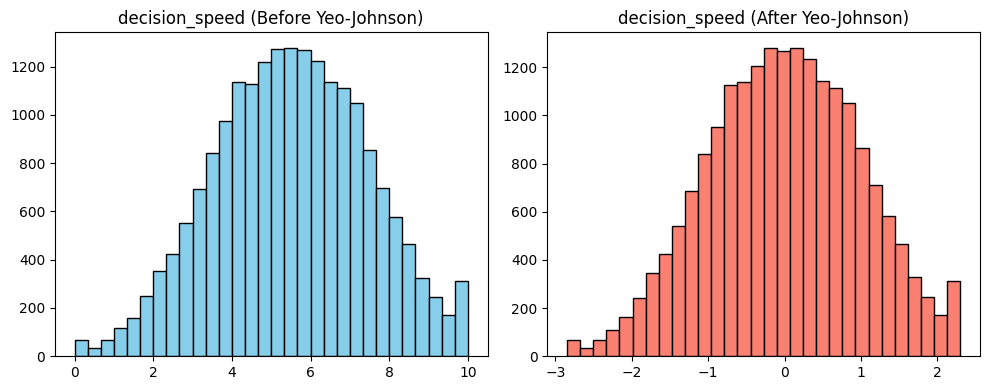

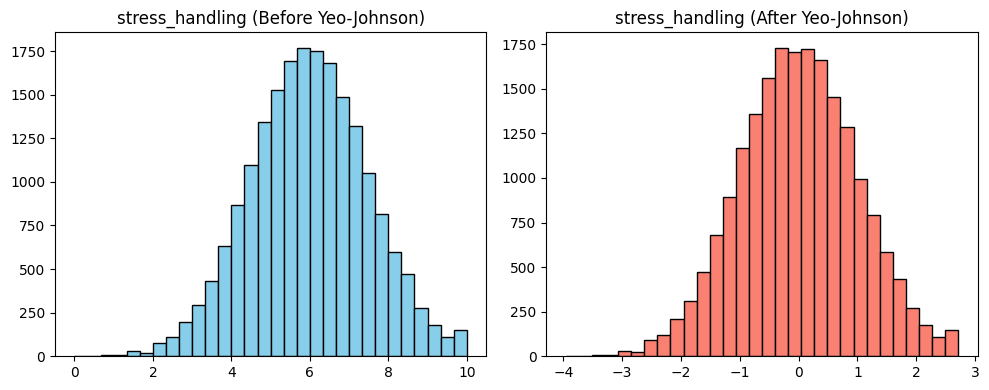

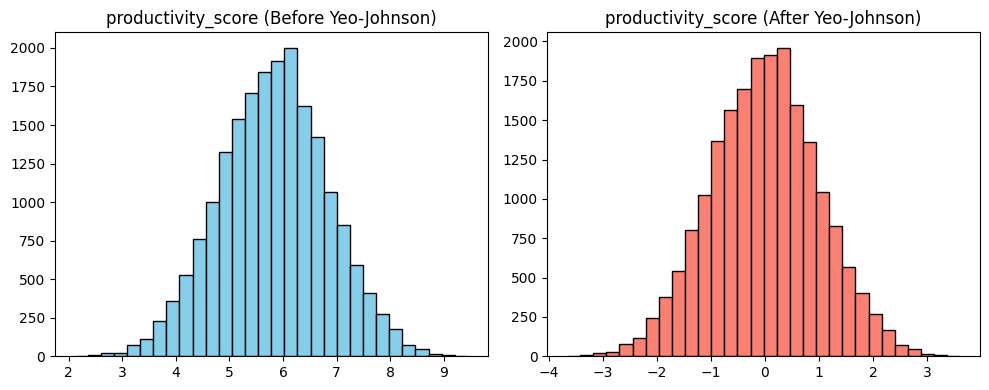

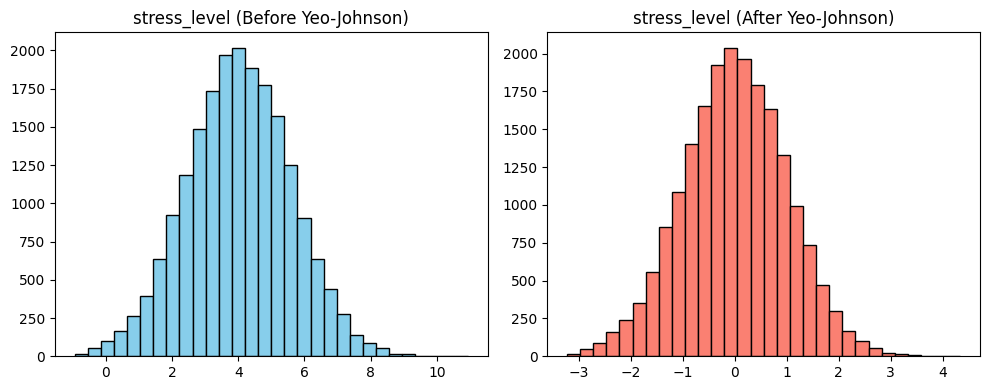

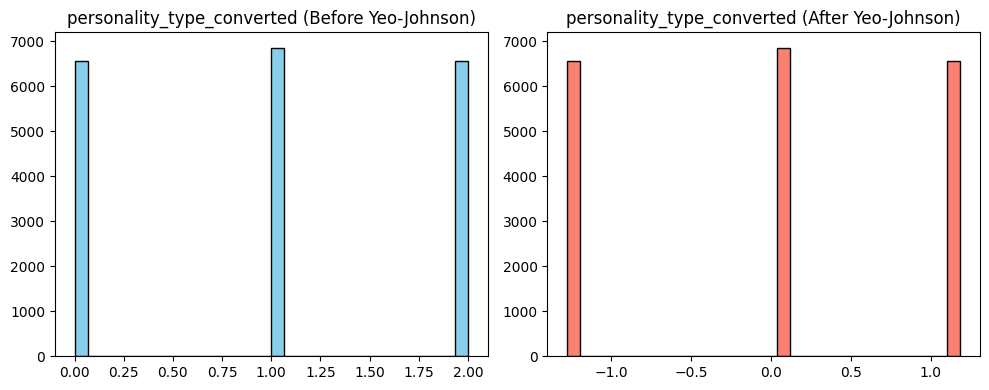

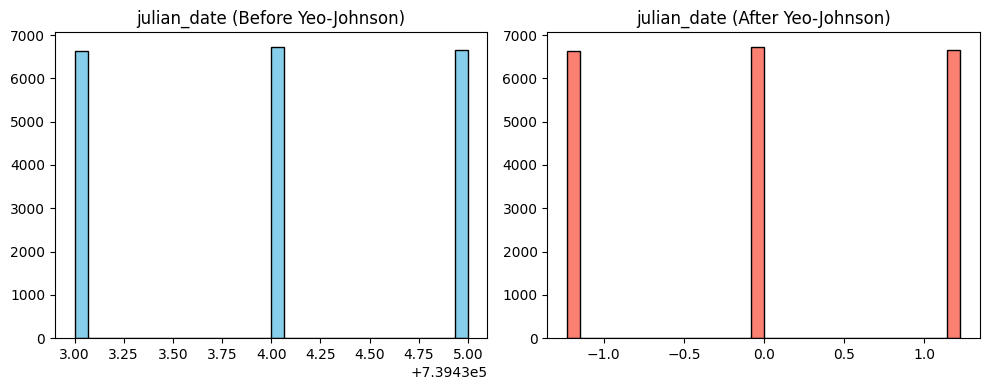

 Skipping 'month_numeric' (constant or invalid values).


,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling,productivity_score,stress_level,personality_type_converted,julian_date
0,0.530048,-0.623805,1.274647,-1.586206,0.490403,1.225990,-0.138167,-0.042482,0.092303,-3.404172,...,1.427639,-0.353933,1.903969,0.960979,1.293213,0.801251,-1.207023,-0.723333,0.087418,1.225875
1,0.365052,0.130957,0.610237,0.606405,-0.879884,-0.589865,-0.868739,-1.632722,0.096651,-0.853491,...,-0.966984,-0.401005,-0.034923,-0.340286,-1.212653,-1.711885,-2.052337,2.237272,-1.276447,-0.001668
2,0.792796,0.363963,-0.633164,-0.621952,-0.319849,0.860277,1.563945,-0.239515,0.689880,0.656174,...,-0.804250,0.329848,0.010816,-0.383996,-0.485056,-0.227013,0.247709,0.422205,-1.276447,-1.229179
3,0.277594,-0.936226,0.210098,-1.835374,0.835978,1.668616,1.533364,1.620169,1.973316,-0.442830,...,0.574856,0.448803,-0.359080,0.073704,0.558217,-0.077664,-0.872671,0.181720,0.087418,-0.001668
4,0.040772,0.623606,-0.636840,1.845936,-1.967412,-1.770668,0.288367,0.171005,2.372332,0.232276,...,0.667053,0.017694,-0.184389,-0.370610,0.153818,-1.489477,-0.169257,1.447959,1.185793,-1.229179


In [13]:

pt = PowerTransformer(method='yeo-johnson')
tukey_transformed = pd.DataFrame()

for col in numeric_df.columns:
    col_data = numeric_df[col]

    if col_data.nunique() <= 1 or not np.isfinite(col_data).all():
        print(f" Skipping '{col}' (constant or invalid values).")
        continue

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot before transformation
    axes[0].hist(col_data, bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f"{col} (Before Yeo-Johnson)")

    try:
        reshaped = col_data.values.reshape(-1, 1)
        transformed = pt.fit_transform(reshaped)
        tukey_transformed[col] = transformed.flatten()
        # Plot after transformation
        axes[1].hist(transformed, bins=30, color='salmon', edgecolor='black')
        axes[1].set_title(f"{col} (After Yeo-Johnson)")
    except Exception as e:
        print(f"Failed to transform '{col}': {e}")
        axes[1].set_visible(False)
    plt.tight_layout()
    plt.show()

display(tukey_transformed.head())

### **Transformations Summary**

The dataset underwent several transformations: cleaning and conversion of datetime strings to Julian dates, mapping month names to numeric values, and encoding categorical variables. Variance-stabilizing transformations were applied using Box-Cox (for positive data) and Yeo-Johnson (Tukey’s Ladder of Powers) methods, with before-and-after visualizations for each numeric column. Box-Cox transformation which will help to stabilize the variance and make the data more normally distributed. Tukey's Ladder of Powers transformation is also doing the same thing, but it can handle zero and negative values.

## References:

- [Understanding the Box-Cox Power Transformer](https://medium.com/@noorfatimaafzalbutt/understanding-the-box-cox-power-transformer-3dbb6613a593)
- [Tukey's ladder of variable transformations](https://blogs.sas.com/content/iml/2022/08/15/tukeys-ladder-transformations.html)
